In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [5]:
df = pd.read_csv(r'/content/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
y = df.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
X = df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


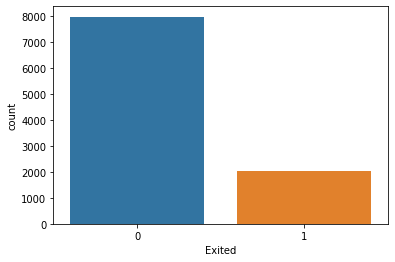

In [9]:
sns.countplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


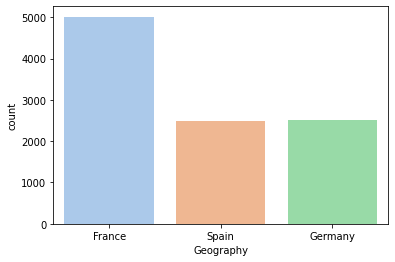

In [10]:
sns.countplot(X['Geography'],palette='pastel')

Male      5457
Female    4543
Name: Gender, dtype: int64


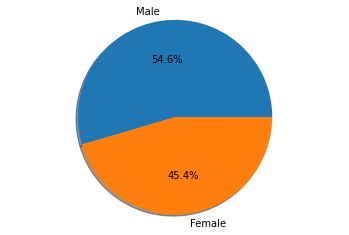

In [11]:
labels = ['Male','Female']
sizes = X['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

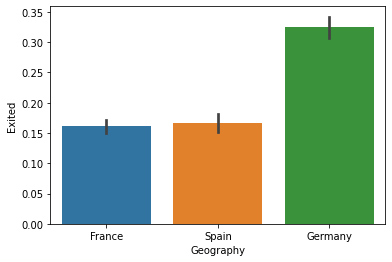

In [12]:
sns.barplot(x='Geography', y='Exited', data=df)

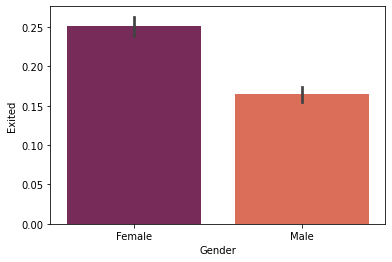

In [13]:
sns.barplot(x='Gender', y='Exited', data=df,palette='rocket')

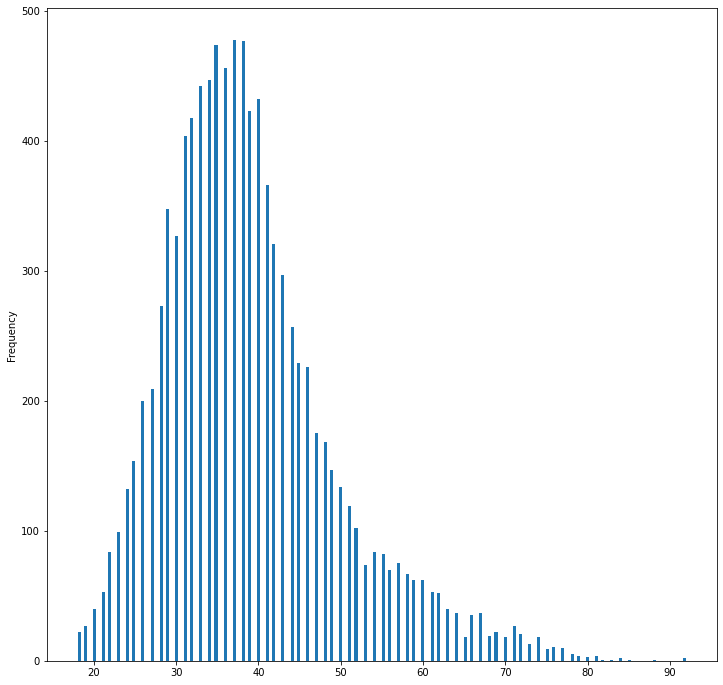

In [14]:
df.Age.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()

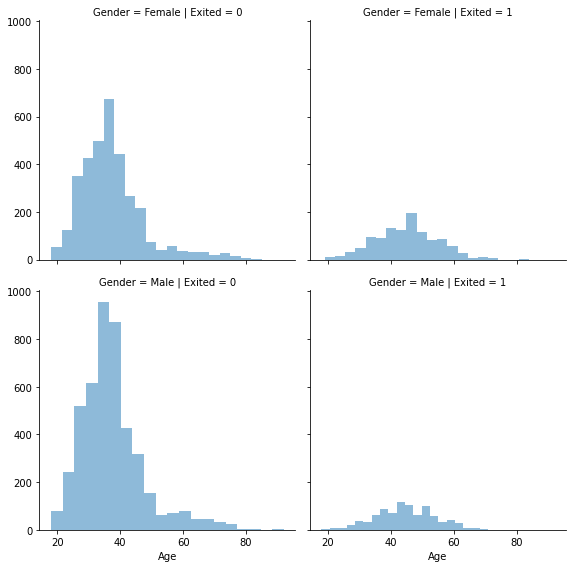

In [15]:
g = sns.FacetGrid(df, row='Gender', col='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

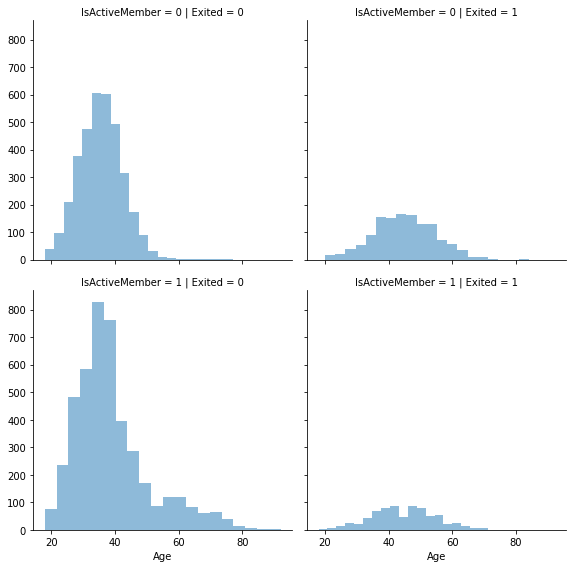

In [16]:
g = sns.FacetGrid(df, row='IsActiveMember', col='Exited', height=4)
g.map(plt.hist,'Age', alpha=0.5, bins=20)
g.add_legend()
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
print(X['Gender'].head(7))

0    0
1    0
2    0
3    0
4    0
5    1
6    1
Name: Gender, dtype: int64


In [18]:
X['Geography']=label.fit_transform(X['Geography'])
print(X['Geography'].head())
X['Geography'].value_counts()

0    0
1    2
2    0
3    0
4    2
Name: Geography, dtype: int64


0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("encoder",OneHotEncoder(),[1])], remainder= 'passthrough')
X = ct.fit_transform(X)
print(X)

[[1.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

In [28]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [29]:
X_train

array([[ 0.56905968, -0.56905968,  0.56905968, ...,  0.64722807,
         0.96581473,  0.56276126],
       [ 0.56905968, -0.56905968,  0.56905968, ...,  0.64722807,
         0.96581473, -1.58504165],
       [ 0.56905968, -0.56905968,  0.56905968, ...,  0.64722807,
        -1.03539526, -1.07751299],
       ...,
       [ 0.56905968, -0.56905968,  0.56905968, ..., -1.54505043,
        -1.03539526, -0.1530867 ],
       [ 0.56905968, -0.56905968,  0.56905968, ...,  0.64722807,
        -1.03539526, -0.06146547],
       [-1.75728493,  1.75728493, -1.75728493, ...,  0.64722807,
         0.96581473, -0.82256561]])

In [30]:
X_test

array([[-1.75728493,  1.75728493, -1.75728493, ..., -1.54505043,
        -1.03539526, -1.02689323],
       [ 0.56905968, -0.56905968,  0.56905968, ...,  0.64722807,
         0.96581473,  0.78530321],
       [ 0.56905968, -0.56905968,  0.56905968, ...,  0.64722807,
        -1.03539526, -0.73627661],
       ...,
       [ 0.56905968, -0.56905968,  0.56905968, ..., -1.54505043,
        -1.03539526, -0.86130337],
       [ 0.56905968, -0.56905968,  0.56905968, ...,  0.64722807,
        -1.03539526,  0.15695849],
       [-1.75728493,  1.75728493, -1.75728493, ...,  0.64722807,
        -1.03539526,  0.69271637]])

In [31]:
#Shape of train and test data
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6500, 14) (6500,)
Test set: (3500, 14) (3500,)


In [32]:
# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
#Train Model  
neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train,y_train)

In [34]:
#Prediction
prediction = neigh.predict(X_test)

In [35]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,0
1,0
2,0
3,0
4,0


In [36]:
#Accuracy
from sklearn import metrics
percent1 = metrics.accuracy_score(y_test, prediction)
percent1

0.8308571428571428

In [37]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [38]:
#Predict
y_pred=classifier.predict(X_test)

In [39]:
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,0
1,0
2,0
3,0
4,0


In [40]:
#Accuracy
percent2 =metrics.accuracy_score(y_test, prediction2)
percent2

0.8565714285714285

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier_4 = RandomForestClassifier(n_estimators=100) #warning 10 to 100
classifier_4.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
#Predict
y_randomfor=classifier_4.predict(X_test)

In [43]:
prediction3=pd.DataFrame(y_randomfor)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [44]:
#Accuracy
percent3 = metrics.accuracy_score(y_test, prediction3)
percent3

0.8665714285714285

In [45]:
#Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
TeleTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [46]:
TeleTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [47]:
y_predtree = TeleTree.predict(X_test)

In [48]:
prediction4=pd.DataFrame(y_pred)
prediction4.head()

,0
0,0
1,0
2,0
3,0
4,0


In [49]:
#Accuracy
percent4 = metrics.accuracy_score(y_test,prediction4)
percent4

0.8565714285714285

In [50]:
models = pd.DataFrame({'name_model':["KNN","SVM","Random Forest","Decision Trees"],\
                        'accuracy_percentage':[percent1,percent2,percent3,percent4]})

In [51]:
models

,name_model,accuracy_percentage
0,KNN,0.830857
1,SVM,0.856571
2,Random Forest,0.866571
3,Decision Trees,0.856571
